# Exercise Sheet 3

In [1]:
# Import necessary libraries
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import fetch_openml # MNIST data
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
%matplotlib inline

## [1] MNIST - regression
The aim of this exercise is to get some experience with logistic regression and regularisation. We
shall use the implementations in sklearn for this exercise.
* Using the SGDClassifer and the LogisticRegression, build classifers for the MNIST dataset.  
* Find some handwritten digits which your classifers are not capable of classifying correctly. How do they differ from correctly classifed digits?  
* Scan over hyper-parameters (i.e. l1, l2 regularisation, different optimisers) and compare the
performance.  
* Compare your results to results you would have obtained by pure random guessing.

### Solution

In [2]:
# Code adapted from the "A high-bias, low-variance introduction to Machine Learning for physicists" review by Mehta et al.

### load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [15]:
print(np.shape(X))

(70000, 784)


Please have a look at the *excellent* [documentation of sklearn](https://scikit-learn.org/stable/modules/linear_model.html). There you will also find detailed information on the different solvers.

In [3]:
train_size = 10000
test_size = 2000

# shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]

# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size)

# scale data to have zero mean and unit variance [required by regressor]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit AND transform
X_test = scaler.transform(X_test)

In [4]:
def log_classify(reg_strength=1e4, multi_class='multinomial', penalty='l2', solver='sag', tol=1e-2):
    t0 = time.time()
    # apply logistic regressor with 'sag' solver, C is the inverse regularization strength
    clf = linear_model.LogisticRegression(C=reg_strength, multi_class=multi_class, penalty=penalty, solver=solver, tol=tol)
    # fit data
    clf.fit(X_train, y_train)
    # percentage of nonzero weights
    sparsity = np.mean(clf.coef_ == 0) * 100
    # compute accuracy
    score = clf.score(X_test, y_test)

    #display run time
    run_time = time.time() - t0
    print('Example run in %.3f s' % run_time)
    print("Sparsity: %.2f%%" % sparsity)
    print("Testscore: %.4f" % score)
    return clf

In [5]:
log_model = log_classify()

Example run in 14.145 s
Sparsity: 13.39%
Testscore: 0.9115


In [6]:
# SGDClassifier

def SGD_classify():
    t0 = time.time()
    clf = linear_model.SGDClassifier(loss='log', max_iter=5, tol=1e-5)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    #display run time
    run_time = time.time() - t0
    print('Example run in %.3f s' % run_time)
    print("Testscore: %.4f" % score)
    return clf

In [7]:
SGD_model = SGD_classify()

Example run in 1.760 s
Testscore: 0.8990


C:\Users\Sophie\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


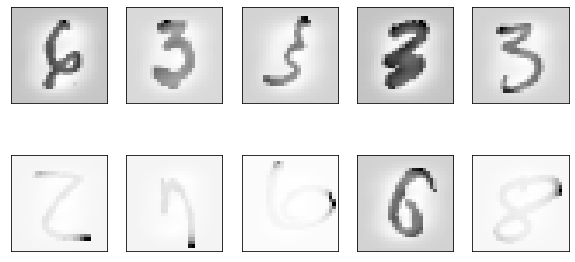

In [8]:
# Find examples that were not classified correctly:

# We use a boolean mask to get those which were not classified correctly -> see 'SupplementaryMaterial3.ipynb'
mask = (log_model.predict(X_test) != y_test)
X_false = X_test[mask]


#plot a few next to each other
plt.figure(figsize=(10, 5))
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(X_false[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
#plt.subplots_adjust(wspace=-0.8,hspace=0, left=0,right=0.5)

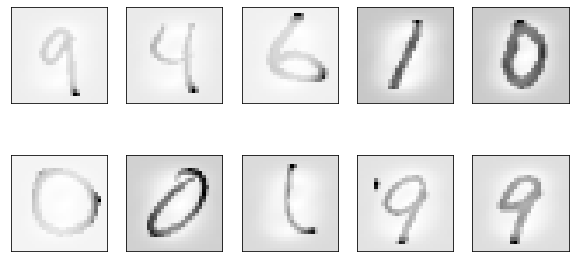

In [9]:
# Compare to correctly classified ones

# We use a boolean mask to get those which were classified correctly
mask = (log_model.predict(X_test) == y_test)
X_true = X_test[mask]


#plot a few next to each other
plt.figure(figsize=(10, 5))
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(X_true[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

We see that those numbers with a lot of straight lines are easier to classify than the ones with loops. The performance on the number 8 seems to be particularly bad. Let's quantify this:

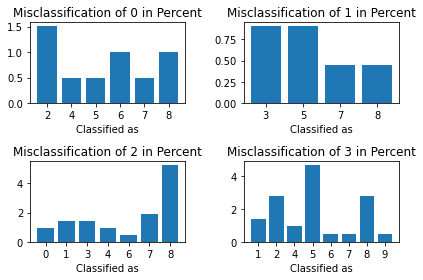

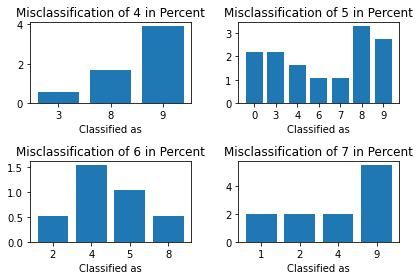

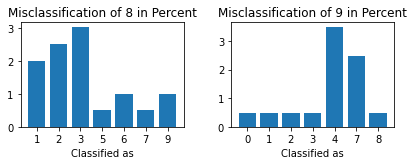

In [10]:
# again we use boolean masking to extract the number of wrongly predited digits.

plt.figure()
for i in range(4):
    prediction_per_class = log_model.predict(X_test)[y_test==str(i)]
    unique, counts = np.unique(prediction_per_class, return_counts=True)
    plt.subplot(2, 2, i+1)
    plt.bar(unique[unique!=str(i)], 100*counts[unique!=str(i)]/len(prediction_per_class))
    plt.title('Misclassification of ' + str(i) + ' in Percent')
    plt.xlabel('Classified as')
plt.tight_layout()

plt.figure()
for i in range(4,8):
    prediction_per_class = log_model.predict(X_test)[y_test==str(i)]
    unique, counts = np.unique(prediction_per_class, return_counts=True)
    plt.subplot(2, 2, i-3)
    plt.bar(unique[unique!=str(i)], 100*counts[unique!=str(i)]/len(prediction_per_class))
    plt.title('Misclassification of ' + str(i) + ' in Percent')
    plt.xlabel('Classified as')
plt.tight_layout()

plt.figure()
for i in range(8,10):
    prediction_per_class = log_model.predict(X_test)[y_test==str(i)]
    unique, counts = np.unique(prediction_per_class, return_counts=True)
    plt.subplot(2, 2, i-7)
    plt.bar(unique[unique!=str(i)], 100*counts[unique!=str(i)]/len(prediction_per_class))
    plt.title('Misclassification of ' + str(i) + ' in Percent')
    plt.xlabel('Classified as')
plt.tight_layout()

We see that 9,8 and 5 are very problematic. 1 is the easiest to classify (intuitively obvious).

Now try L1 regularization

In [11]:
# we use the saga solver because it supports l1 regularization
log_classify(reg_strength=1e4, multi_class='multinomial', penalty='l1', solver='saga', tol=1e-2)

Example run in 49.398 s
Sparsity: 13.39%
Testscore: 0.9080


LogisticRegression(C=10000.0, multi_class='multinomial', penalty='l1',
                   solver='saga', tol=0.01)

We see that there is no significant difference. Let's try other choices of solvers. Supported are (‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’)

In [12]:
log_classify(reg_strength=1e4, multi_class='ovr', penalty='l2', solver='liblinear', tol=1e-2)

Example run in 102.223 s
Sparsity: 13.39%
Testscore: 0.8625


LogisticRegression(C=10000.0, multi_class='ovr', solver='liblinear', tol=0.01)

Runtime is significantly longer. The result is also significantly worse.

In [13]:
log_classify(reg_strength=1e4, multi_class='multinomial', penalty='l2', solver='newton-cg', tol=1e-2)

Example run in 19.414 s
Sparsity: 13.39%
Testscore: 0.8630


LogisticRegression(C=10000.0, multi_class='multinomial', solver='newton-cg',
                   tol=0.01)

Result is comparatively poor.

In [14]:
log_classify(reg_strength=1e4, multi_class='multinomial', penalty='l2', solver='lbfgs', tol=1e-2)

Example run in 3.115 s
Sparsity: 13.39%
Testscore: 0.8675


C:\Users\Sophie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10000.0, multi_class='multinomial', tol=0.01)

This is quite fast but gives a poor result.

You are invited to also explore what happens if we change the tolerance and regularization strength. Looping over this should be quite straightforward given the function ``log_classify()``.

Of course we see that all of the results are much better than random guessing, which would have a 0.1 success rate.